In [1]:
# ZumiDashBoard
# jupyter dashboard for Zümi Robots

## Task
#Build a live dashboard wich runs on zumi:
#* showing all sensor data
#* live cam
#* remote driving

In [2]:
#Importe
import param
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
#import seaborn as sns
import panel as pn
from zumi.zumi import Zumi
import cv2
import IPython.display
import PIL.Image
from numpy import genfromtxt
import time
import picamera
import csv
from streamz import Stream
from zumi.util.screen import Screen
from zumi.util.camera import Camera
pn.extension()
%matplotlib inline

In [3]:
#Zumi starten
zumi = Zumi()

Starting Zumi 
Pi Zero I2C is available
Verified Pi Zero is the same
Gyroscope previously calibrated
Zumi board detected
OLED Screen detected
Gyroscope & Accelerometer detected


In [4]:
# Aufgabe 1: remote driving Buttons 
fahren = pn.widgets.Button(name='\u25B2', button_type='success', width=100)
links = pn.widgets.Button(name='\u25c0', button_type='success', width=100)
rechts = pn.widgets.Button(name='\u25b6', button_type='success', width=100)
rückwärts = pn.widgets.Button(name='\u25BC', button_type='success', width=100)

def links_func(event):
    zumi.turn_left()
def rechts_func(event):
    zumi.turn_right()
def fahren_func(event):
    zumi.forward()
def rückwärts_func(event):
    zumi.reverse()

    
links.on_click(links_func)

rechts.on_click(rechts_func)

fahren.on_click(fahren_func)

rückwärts.on_click(rückwärts_func)

# 1) Remote Driving Anzeige
#space1 = "                    "
#print(space1+"Zumi Bewegungsrichtungen")
#pn.Row(links,fahren,rückwärts,rechts)

In [5]:
# Aufgabe 2 Lichter Buttons
lichtVorneAn = pn.widgets.Button(name='Licht vorne an', button_type='success', width=100)
lichtVorneAus = pn.widgets.Button(name='Licht vorne aus', button_type='success', width=100)
lichtHintenAn = pn.widgets.Button(name='Licht hinten an', button_type='success', width=100)
lichtHintenAus = pn.widgets.Button(name='Licht hinten aus', button_type='success', width=100)


def lichtVorneAn_func(event):
    zumi.headlights_on()
def lichtVorneAus_func(event):
    zumi.headlights_off()
def lichtHintenAn_func(event):
    zumi.hazard_lights_on()
def lichtHintenAus_func(event):
    zumi.hazard_lights_off()

    
lichtVorneAn.on_click(lichtVorneAn_func)

lichtVorneAus.on_click(lichtVorneAus_func)

lichtHintenAn.on_click(lichtHintenAn_func)

lichtHintenAus.on_click(lichtHintenAus_func)

# 2) Lichter Anzeige
#space2 = "                    "
#print(space2+"Zumi Lichter")
#pn.Row(lichtVorneAn, lichtVorneAus, lichtHintenAn, lichtHintenAus)

In [18]:
#Dashboard Anzeige
# 1) Remote Driving Anzeige
space1 = "                    "
print(space1+"   Dashboard Anzeige")
print(space1)
print(space1+"Zumi Bewegungsrichtungen")
pn.Row(links,fahren,rückwärts,rechts)

                       Dashboard Anzeige
                    
                    Zumi Bewegungsrichtungen


Row
    [0] Button(button_type='success', name='◀', width=100)
    [1] Button(button_type='success', name='▲', width=100)
    [2] Button(button_type='success', name='▼', width=100)
    [3] Button(button_type='success', name='▶', width=100)

In [26]:
# 2) Lichter Anzeige
space2 = "                       "
print(space2+"Zumi Lichter")
pn.Row(lichtVorneAn, lichtVorneAus, lichtHintenAn, lichtHintenAus)

                       Zumi Lichter


Row
    [0] Button(button_type='success', name='Licht vorne an', width=100)
    [1] Button(button_type='success', name='Licht vorne aus', width=100)
    [2] Button(button_type='success', name='Licht hinten an', width=100)
    [3] Button(button_type='success', name='Licht hinten aus', width=100)

In [16]:
# 3) zeige alle Sensordaten von Zumi an

print("Sensordaten:")
FRONT_RIGHT = zumi.get_IR_data(0)
print("Front Right:",FRONT_RIGHT)

BOTTOM_RIGHT = zumi.get_IR_data(1)
print("Bottom Right:",BOTTOM_RIGHT)

BACK_RIGHT = zumi.get_IR_data(2)
print("Back Right:",BACK_RIGHT)

BOTTOM_LEFT = zumi.get_IR_data(3)
print("Bottom Left:",BOTTOM_LEFT)

BACK_LEFT = zumi.get_IR_data(4)
print("Back Left:",BACK_LEFT)

FRONT_LEFT = zumi.get_IR_data(5)
print("Front Left:",FRONT_LEFT)

BATTERY_VOLTAGE = zumi.get_battery_voltage()
print("Batterie Voltage:",BATTERY_VOLTAGE)

#BATTERY_PERCENTAGE = str(zumi.get_battery_percentage())
#print("Batterie Percentage:",zumi.get_battery_percentage())
#AttributeError: 'Zumi' object has no attribute 'get_battery_percentage'

Sensordaten:
Front Right: 170
Bottom Right: 75
Back Right: 124
Bottom Left: 59
Back Left: 55
Front Left: 194
Batterie Voltage: 3.6


In [13]:
# 4) Speichere Sensordaten Anzeige in csv Datei und gebe Inhalt aus
ar = zumi.get_all_IR_data()
a=np.array([ar[0], ar[1], ar[2],ar[3],ar[4],ar[5]])
np.savetxt("sensor_csv.csv", a, delimiter=",")

csv_data = genfromtxt('sensor_csv.csv', delimiter=',')
print("Sensordaten in csv:")
print(csv_data)

Sensordaten in csv:
[163.  58. 119.  53.  53. 191.]


In [21]:
# 5) Plot Sensordaten

cols=['Sensordaten aus csv'] 
rows

df = pd.read_csv('sensor_csv.csv', names=cols, header=None)

df.head(6)

,Sensordaten aus csv
0,163.0
1,58.0
2,119.0
3,53.0
4,53.0
5,191.0


In [21]:
# 6) Liveübertragung von Zumi-Kamera
print("Liveübertragung von Zumi-Kamera")
camera = Camera()
camera.start_camera()

try:
    for i in range(5):
        frame=camera.capture()
        print(np.shape(frame))
        IPython.display.display(PIL.Image.fromarray(frame))
        time.sleep(2) # langsamere Bildrate
        IPython.display.clear_output(wait=True)
finally:
    camera.close()
    


Closing PiCamera


Ausgabe Kamerabild


JPG(str)
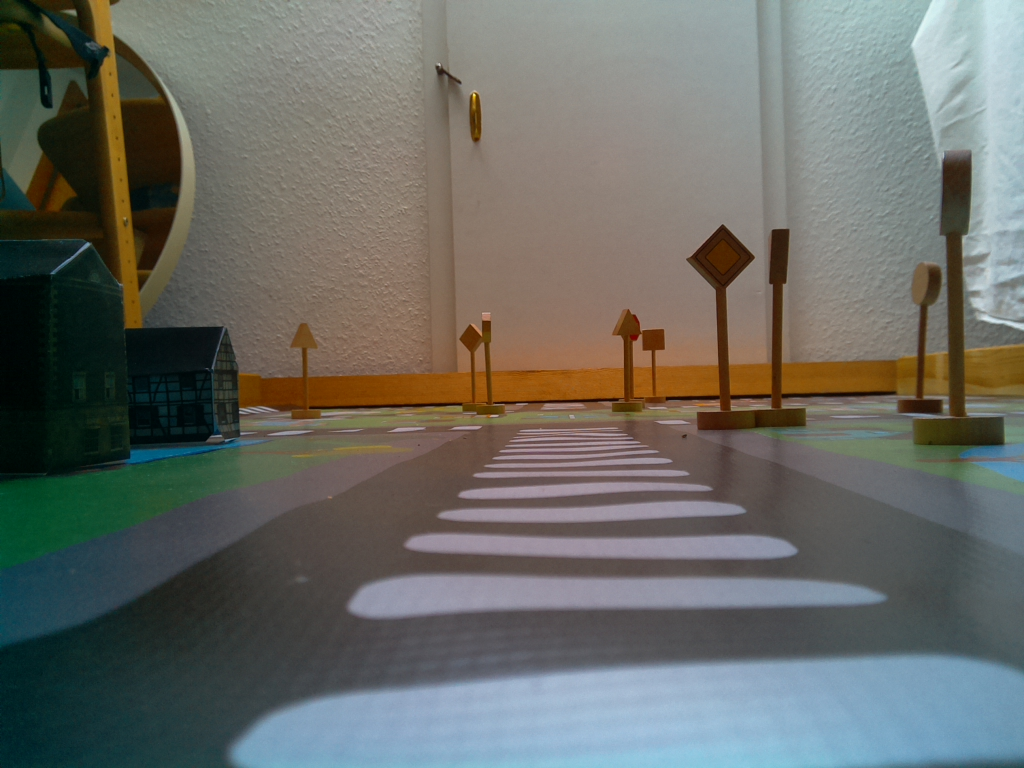

In [22]:
# 7)Speichere Kamerabild und gebe es aus
print("Ausgabe Kamerabild")
with picamera.PiCamera() as camera:
    camera.resolution = (1024, 768)
    camera.start_preview()
    camera.rotation = 180
    camera.capture('out.jpg')    
        
pn.pane.JPG('out.jpg')